In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

 


### 한글 encoding
* ut 8
* cp949

In [96]:
df = pd.read_csv("./data/apartment.csv", encoding='ansi')
df

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6200,제주,모든면적,2021,10,"6,860"
6201,제주,전용면적 60제곱미터이하,2021,10,-
6202,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,10,"6,787"
6203,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,10,"5,924"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6205 non-null   object
 1   규모구분        6205 non-null   object
 2   연도          6205 non-null   int64 
 3   월           6205 non-null   int64 
 4   분양가격(제곱미터)  5734 non-null   object
dtypes: int64(2), object(3)
memory usage: 242.5+ KB


In [112]:
df.isna().sum()

지역명           0
규모구분          0
연도            0
월             0
분양가격(제곱미터)    0
dtype: int64

In [111]:
df.dropna(inplace=True)

In [20]:
df.loc[df["분양가격(제곱미터)"].isna()]

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN
374,대전,전용면적 102제곱미터초과,2016,2,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
421,제주,전용면적 60제곱미터이하,2016,2,NaN
...,...,...,...,...,...
5984,대전,전용면적 102제곱미터초과,2021,8,NaN
5989,울산,전용면적 102제곱미터초과,2021,8,NaN
6018,전남,전용면적 85제곱미터초과 102제곱미터이하,2021,8,NaN
6031,제주,전용면적 60제곱미터이하,2021,8,NaN


In [42]:
df.loc['분양가격(제곱미터)']

KeyError: '분양가격(제곱미터)'

In [22]:
df.loc[df["분양가격(제곱미터)"].isna()]

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN
374,대전,전용면적 102제곱미터초과,2016,2,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
421,제주,전용면적 60제곱미터이하,2016,2,NaN
...,...,...,...,...,...
5984,대전,전용면적 102제곱미터초과,2021,8,NaN
5989,울산,전용면적 102제곱미터초과,2021,8,NaN
6018,전남,전용면적 85제곱미터초과 102제곱미터이하,2021,8,NaN
6031,제주,전용면적 60제곱미터이하,2021,8,NaN


In [88]:
df.iloc[0]

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [113]:
df["분양가격(제곱미터)"] = df["분양가격(제곱미터)"].apply(lambda x : str(x).strip().replace(",",""))
df["분양가격(제곱미터)"]

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
6200    6860
6201       -
6202    6787
6203    5924
6204    6815
Name: 분양가격(제곱미터), Length: 6205, dtype: object

In [114]:
indexes = []
errors = []
for i,j in enumerate(df["분양가격(제곱미터)"]):
    try:
        float(j)
        indexes.append(i)
    except:
        errors.append(j)

In [100]:
errors

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-']

In [115]:
np.array(errors).unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [41]:
indexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 115,
 116,
 117,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 1

In [51]:
for i in pd.Series(errors).unique()
    print(i)

SyntaxError: invalid syntax (Temp/ipykernel_8376/2283553297.py, line 1)

In [101]:
df.iloc[indexes]

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6199,경남,전용면적 102제곱미터초과,2021,10,3599
6200,제주,모든면적,2021,10,6860
6202,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,10,6787
6203,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,10,5924


In [116]:
df_clean = df.iloc[indexes]


In [122]:
df_clean.isna().sum()

지역명           0
규모구분          0
연도            0
월             0
분양가격(제곱미터)    0
dtype: int64

In [124]:
df_clean['분양가격(제곱미터)'] = df_clean['분양가격(제곱미터)'].astype("float")

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8376/2310760319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['분양가격(제곱미터)'] = df_clean['분양가격(제곱미터)'].astype("float")


In [125]:
df_clean['평당분양가'] = df_clean['분양가격(제곱미터)'] * 3.3

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8376/675635003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['평당분양가'] = df_clean['분양가격(제곱미터)'] * 3.3


In [126]:
df_clean['평당분양가']

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
6199    11876.7
6200    22638.0
6202    22397.1
6203    19549.2
6204    22489.5
Name: 평당분양가, Length: 6174, dtype: float64

In [127]:
df_clean["규모구분"].unique()

array(['모든면적', ' 60', ' 60 ~  85', ' 85 ~  102', ' 102 ~ '], dtype=object)

In [128]:
df_clean["규모구분"] = df_clean["규모구분"].str.replace("전용면적","")
df_clean["규모구분"] = df_clean["규모구분"].str.replace("제곱미터","")
df_clean["규모구분"] = df_clean["규모구분"].str.replace("이하","")
df_clean["규모구분"] = df_clean["규모구분"].str.replace("초과"," ~ ")
df_clean["규모구분"]


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8376/4013745128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["규모구분"] = df_clean["규모구분"].str.replace("전용면적","")
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8376/4013745128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["규모구분"] = df_clean["규모구분"].str.replace("제곱미터","")
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8376/4013745128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

0             모든면적
1               60
2         60 ~  85
3        85 ~  102
4           102 ~ 
           ...    
6199        102 ~ 
6200          모든면적
6202      60 ~  85
6203     85 ~  102
6204        102 ~ 
Name: 규모구분, Length: 6174, dtype: object

In [130]:
df_clean.drop("분양가격(제곱미터)", axis=1, inplace=True)

KeyError: "['분양가격(제곱미터)'] not found in axis"

In [131]:
df_clean

,지역명,규모구분,연도,월,평당분양가
0,서울,모든면적,2015,10,19275.3
1,서울,60,2015,10,18651.6
2,서울,60 ~ 85,2015,10,19410.6
3,서울,85 ~ 102,2015,10,18879.3
4,서울,102 ~,2015,10,19400.7
...,...,...,...,...,...
6199,경남,102 ~,2021,10,11876.7
6200,제주,모든면적,2021,10,22638.0
6202,제주,60 ~ 85,2021,10,22397.1
6203,제주,85 ~ 102,2021,10,19549.2


In [74]:
df_clean.head()

,지역명,규모구분,연도,월
0,서울,모든면적,2015,10
1,서울,60,2015,10
2,서울,60 ~ 85,2015,10
3,서울,85 ~ 102,2015,10
4,서울,102 ~,2015,10


In [75]:
# 지역별 평당 분양가격

In [132]:
dfc = df_clean.copy()

<AxesSubplot:xlabel='지역명'>

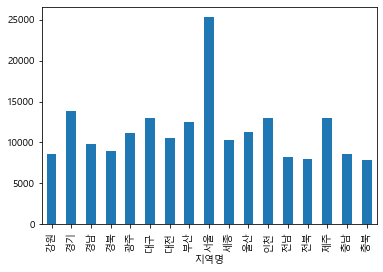

In [135]:
dfc.groupby("지역명")["평당분양가"].mean().plot(kind='bar')

In [78]:
# 2021년도와 지역별 분양가 평균 
df.연도 

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
6200    2021
6201    2021
6202    2021
6203    2021
6204    2021
Name: 연도, Length: 6205, dtype: int64

In [79]:
dfc.head(1)

,지역명,규모구분,연도,월
0,서울,모든면적,2015,10


<AxesSubplot:xlabel='지역명'>

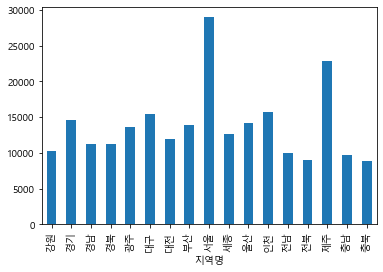

In [136]:
dfc[dfc.연도 == 2021].groupby("지역명")["평당분양가"].mean().plot(kind='bar')

In [ ]:
# 2015~21년사이 지역별 분양가 변화 라인차트 

<AxesSubplot:xlabel='연도'>

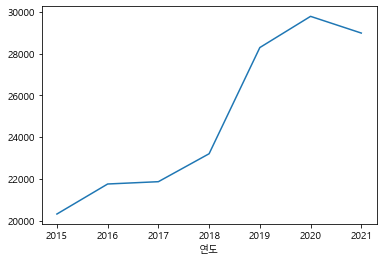

In [137]:
df_clean[df_clean['지역명'] == "서울"].groupby("연도")["평당분양가"].mean().plot()

<AxesSubplot:>

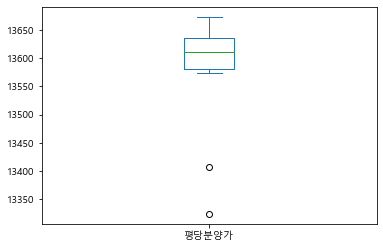

In [138]:
df_clean[df_clean.연도 == 2021].groupby("월")["평당분양가"].mean().plot(kind='box')

<AxesSubplot:>

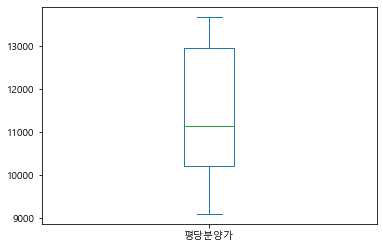

In [139]:
df_clean.groupby(["연도","월"])["평당분양가"].mean().plot(kind='box')